# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import xgboost as xgb
from sklearn.metrics import *

# Import Data

In [3]:
df = pd.read_csv('Turbine_Data.csv',
                 parse_dates=['Unnamed: 0'], index_col=['Unnamed: 0'])
df.index = pd.to_datetime(df.index)

In [5]:
df.head()

ActivePower  AmbientTemperatue  \
2017-12-31 00:00:00+00:00          NaN                NaN   
2017-12-31 00:10:00+00:00          NaN                NaN   
2017-12-31 00:20:00+00:00          NaN                NaN   
2017-12-31 00:30:00+00:00          NaN                NaN   
2017-12-31 00:40:00+00:00          NaN                NaN   

                           BearingShaftTemperature  Blade1PitchAngle  \
2017-12-31 00:00:00+00:00                      NaN               NaN   
2017-12-31 00:10:00+00:00                      NaN               NaN   
2017-12-31 00:20:00+00:00                      NaN               NaN   
2017-12-31 00:30:00+00:00                      NaN               NaN   
2017-12-31 00:40:00+00:00                      NaN               NaN   

                           Blade2PitchAngle  Blade3PitchAngle  \
2017-12-31 00:00:00+00:00               NaN               NaN   
2017-12-31 00:10:00+00:00               NaN               NaN   
2017-12-31 00:20:00+00:00               NaN               NaN   
2017-12-31 00:30:00+00:00               NaN               NaN   
2017-12-31 00:40:00+00:00               NaN               NaN   

                           ControlBoxTemperature  GearboxBearingTemperature  \
2017-12-31 00:00:00+00:00                    NaN                        NaN   
2017-12-31 00:10:00+00:00                    NaN                        NaN   
2017-12-31 00:20:00+00:00                    NaN                        NaN   
2017-12-31 00:30:00+00:00                    NaN                        NaN   
2017-12-31 00:40:00+00:00                    NaN                        NaN   

                           GearboxOilTemperature  GeneratorRPM  ...  \
2017-12-31 00:00:00+00:00                    NaN           NaN  ...   
2017-12-31 00:10:00+00:00                    NaN           NaN  ...   
2017-12-31 00:20:00+00:00                    NaN           NaN  ...   
2017-12-31 00:30:00+00:00                    NaN           NaN  ...   
2017-12-31 00:40:00+00:00                    NaN           NaN  ...   

                           GeneratorWinding2Temperature  HubTemperature  \
2017-12-31 00:00:00+00:00                           NaN             NaN   
2017-12-31 00:10:00+00:00                           NaN             NaN   
2017-12-31 00:20:00+00:00                           NaN             NaN   
2017-12-31 00:30:00+00:00                           NaN             NaN   
2017-12-31 00:40:00+00:00                           NaN             NaN   

                           MainBoxTemperature  NacellePosition  ReactivePower  \
2017-12-31 00:00:00+00:00                 NaN              NaN            NaN   
2017-12-31 00:10:00+00:00                 NaN              NaN            NaN   
2017-12-31 00:20:00+00:00                 NaN              NaN            NaN   
2017-12-31 00:30:00+00:00                 NaN              NaN            NaN   
2017-12-31 00:40:00+00:00                 NaN              NaN            NaN   

                           RotorRPM  TurbineStatus  WTG WindDirection  \
2017-12-31 00:00:00+00:00       NaN            NaN  G01           NaN   
2017-12-31 00:10:00+00:00       NaN            NaN  G01           NaN   
2017-12-31 00:20:00+00:00       NaN            NaN  G01           NaN   
2017-12-31 00:30:00+00:00       NaN            NaN  G01           NaN   
2017-12-31 00:40:00+00:00       NaN            NaN  G01           NaN   

                           WindSpeed  
2017-12-31 00:00:00+00:00        NaN  
2017-12-31 00:10:00+00:00        NaN  
2017-12-31 00:20:00+00:00        NaN  
2017-12-31 00:30:00+00:00        NaN  
2017-12-31 00:40:00+00:00        NaN  

[5 rows x 21 columns]

# Clean Data

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.shape

(95185, 21)

In [6]:
# Check how many unique values in every columns
df.nunique()

ActivePower                     94084
AmbientTemperatue               93678
BearingShaftTemperature         62286
Blade1PitchAngle                38946
Blade2PitchAngle                39021
Blade3PitchAngle                39021
ControlBoxTemperature               1
GearboxBearingTemperature       62313
GearboxOilTemperature           62412
GeneratorRPM                    61074
GeneratorWinding1Temperature    62406
GeneratorWinding2Temperature    62424
HubTemperature                  38119
MainBoxTemperature              49145
NacellePosition                  6664
ReactivePower                   94040
RotorRPM                        59254
TurbineStatus                     353
WTG                                 1
WindDirection                    6664
WindSpeed                       94224
dtype: int64

In [7]:
# Remove the columns with only 1 unique value
df.drop(['ControlBoxTemperature','WTG'], axis=1, inplace=True)

In [8]:
df.shape

(95185, 19)

In [9]:
# Check stats of the data
df.describe()

ActivePower  AmbientTemperatue  BearingShaftTemperature  \
count  94624.000000       93698.000000             62380.000000   
mean     619.036994          28.777569                43.105338   
std      610.917748           4.358470                 5.168850   
min      -38.524659           0.000000                 0.000000   
25%       80.098952          25.625603                39.856871   
50%      402.880706          28.338961                42.927465   
75%     1073.979105          31.665910                47.018075   
max     1779.032433          42.405597                55.088655   

       Blade1PitchAngle  Blade2PitchAngle  Blade3PitchAngle  \
count      41987.000000      41882.000000      41882.000000   
mean           9.751759         10.038709         10.038709   
std           20.646533         20.272100         20.272100   
min          -43.156734        -26.443415        -26.443415   
25%           -0.939896         -0.433316         -0.433316   
50%            0.395038          0.889782          0.889782   
75%            8.101939          8.481306          8.481306   
max           90.143610         90.017830         90.017830   

       GearboxBearingTemperature  GearboxOilTemperature  GeneratorRPM  \
count               62402.000000           62430.000000  62287.000000   
mean                   64.376222              57.561706   1102.146658   
std                    10.020754               6.324124    527.967896   
min                     0.000000               0.000000      0.000000   
25%                    57.925129              53.944023   1029.812895   
50%                    64.862406              57.197064   1124.930500   
75%                    71.104401              61.307270   1515.517020   
max                    82.237932              70.764581   1809.941700   

       GeneratorWinding1Temperature  GeneratorWinding2Temperature  \
count                  62419.000000                  62441.000000   
mean                      72.462897                     71.829134   
std                       22.626685                     22.649494   
min                        0.000000                      0.000000   
25%                       55.492241                     54.763998   
50%                       65.792061                     65.006679   
75%                       85.874609                     85.342714   
max                      126.773031                    126.043018   

       HubTemperature  MainBoxTemperature  NacellePosition  ReactivePower  \
count    62268.000000        62369.000000     72108.000000   94622.000000   
mean        36.979752           39.635107       196.307894      88.070309   
std          4.884101            5.428555        88.279316     116.498176   
min          0.000000            0.000000         0.000000    -203.182591   
25%         33.977709           35.843574       145.000000      -0.433723   
50%         37.003815           39.500759       182.000000      35.938526   
75%         40.009538           43.370342       271.000000     147.190453   
max         47.996185           54.250000       357.000000     403.713620   

           RotorRPM  TurbineStatus  WindDirection     WindSpeed  
count  62119.000000   6.275900e+04   72108.000000  94469.000000  
mean       9.908585   2.284016e+03     196.307894      5.879193  
std        4.717546   3.590288e+05      88.279316      2.617241  
min        0.000000   0.000000e+00       0.000000      0.000000  
25%        9.231097   2.000000e+00     145.000000      3.824572  
50%       10.099272   2.000000e+00     182.000000      5.558520  
75%       13.600908   2.000000e+00     271.000000      7.505555  
max       16.273495   6.574653e+07     357.000000     22.970893

In [10]:
# Power cant be negative so we need to remove the rows with negative power as they are invalid
df = df[df['ActivePower']>=0]
df.shape

(78989, 19)

In [11]:
# Check if we have more to remove
df.describe()

ActivePower  AmbientTemperatue  BearingShaftTemperature  \
count  78989.000000       77957.000000             52168.000000   
mean     742.779831          28.443080                43.885682   
std      595.334913           4.119607                 4.989832   
min        0.000000           0.000000                 0.000000   
25%      225.562517          25.473630                40.575654   
50%      555.505381          28.049530                43.831462   
75%     1269.581314          31.231477                47.813746   
max     1779.032433          41.809714                55.088655   

       Blade1PitchAngle  Blade2PitchAngle  Blade3PitchAngle  \
count      35707.000000      35624.000000      35624.000000   
mean           3.002703          3.462299          3.462299   
std           10.981182         10.882891         10.882891   
min           -1.960466         -2.406213         -2.406213   
25%           -0.979453         -0.473327         -0.473327   
50%           -0.197471          0.295915          0.295915   
75%            2.170674          2.601339          2.601339   
max           89.027520         88.915344         88.915344   

       GearboxBearingTemperature  GearboxOilTemperature  GeneratorRPM  \
count               52170.000000           52183.000000  52179.000000   
mean                   66.805007              58.915467   1285.209153   
std                     8.809819               5.736098    336.558561   
min                     0.000000               0.000000      0.000000   
25%                    61.629546              55.577620   1030.767510   
50%                    66.542548              58.134012   1231.126300   
75%                    72.759474              62.503315   1592.696747   
max                    82.237932              70.764581   1809.941700   

       GeneratorWinding1Temperature  GeneratorWinding2Temperature  \
count                  52197.000000                  52204.000000   
mean                      76.622661                     75.965815   
std                       22.092388                     22.149700   
min                        0.000000                      0.000000   
25%                       59.694965                     58.885719   
50%                       69.688523                     68.941923   
75%                       92.631987                     92.135842   
max                      126.773031                    126.043018   

       HubTemperature  MainBoxTemperature  NacellePosition  ReactivePower  \
count    52059.000000        52148.000000     58560.000000   78947.000000   
mean        37.241433           39.300644       196.945957     107.690786   
std          4.726533            5.303889        88.256950     118.044136   
min          0.000000            0.000000         0.000000    -203.182591   
25%         33.996185           35.556255       148.000000       0.587574   
50%         37.022819           39.262500       181.666667      63.088679   
75%         40.917918           42.960085       273.517857     180.786697   
max         47.996185           53.768750       357.000000     403.713620   

           RotorRPM  TurbineStatus  WindDirection     WindSpeed  
count  52173.000000   5.252300e+04   58560.000000  78681.000000  
mean      11.531054   2.564949e+03     196.945957      6.508584  
std        3.004769   3.924549e+05      88.256950      2.380567  
min        0.000000   0.000000e+00       0.000000      0.000000  
25%        9.245588   2.000000e+00     148.000000      4.694561  
50%       11.041127   2.000000e+00     181.666667      6.104735  
75%       14.281437   2.000000e+00     273.517857      7.938625  
max       16.273495   6.574653e+07     357.000000     22.970893

In [12]:
# Check NANs based on % of rows
df.isna().sum()/df.shape[0]

ActivePower                     0.000000
AmbientTemperatue               0.013065
BearingShaftTemperature         0.339554
Blade1PitchAngle                0.547950
Blade2PitchAngle                0.549000
Blade3PitchAngle                0.549000
GearboxBearingTemperature       0.339528
GearboxOilTemperature           0.339364
GeneratorRPM                    0.339414
GeneratorWinding1Temperature    0.339186
GeneratorWinding2Temperature    0.339098
HubTemperature                  0.340934
MainBoxTemperature              0.339807
NacellePosition                 0.258631
ReactivePower                   0.000532
RotorRPM                        0.339490
TurbineStatus                   0.335059
WindDirection                   0.258631
WindSpeed                       0.003899
dtype: float64

## Plot Checks

In [13]:
df2 = df.copy()

In [14]:
#scale so we can plot them
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()
df2 = pd.DataFrame(scaler.fit_transform(df2.values), columns=df2.columns, index=df.index)

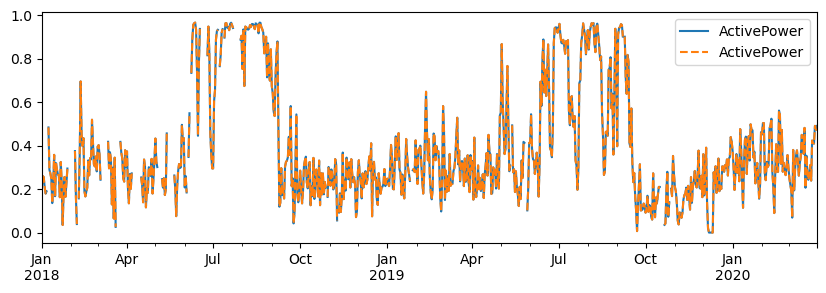

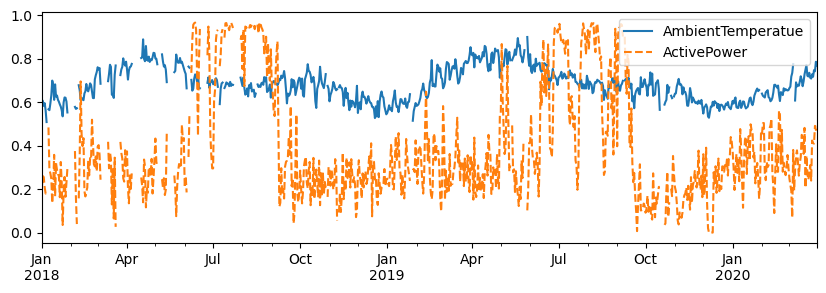

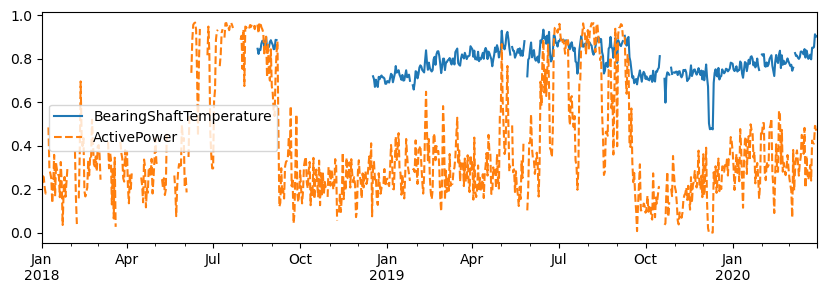

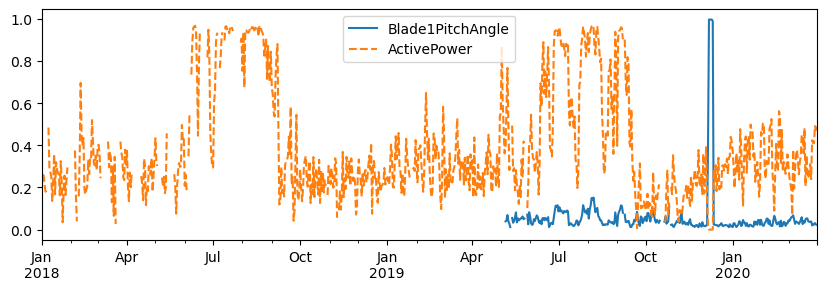

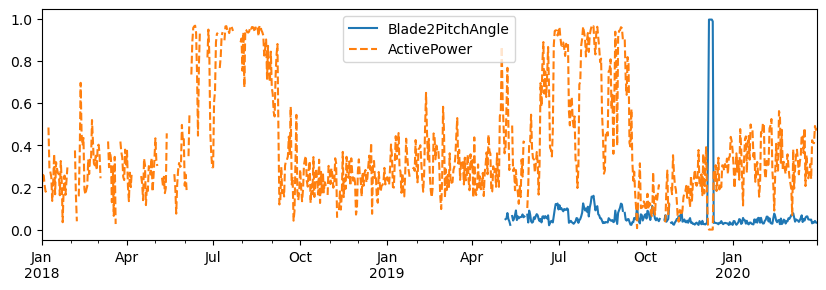

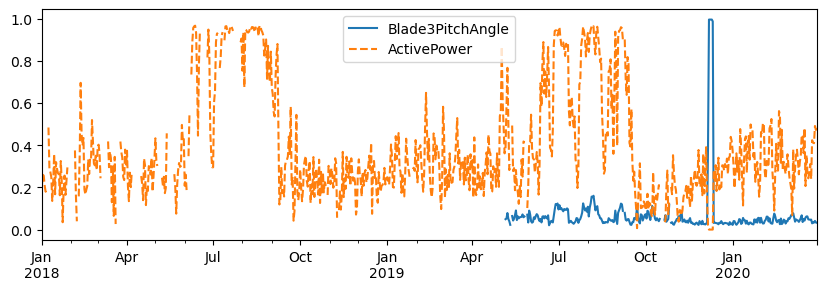

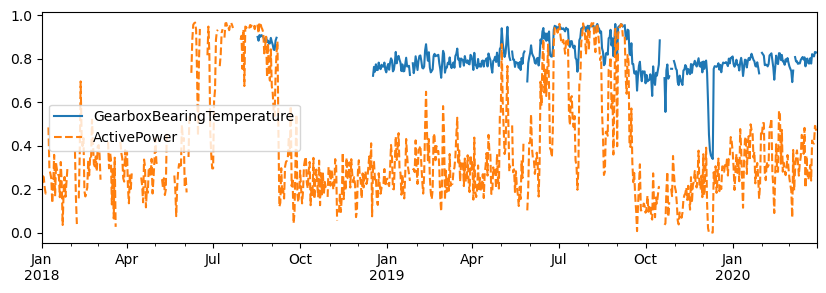

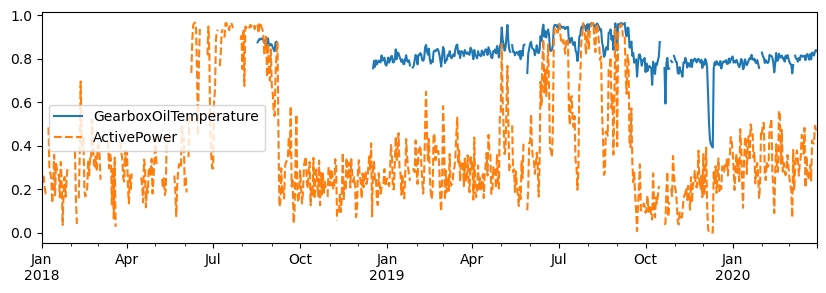

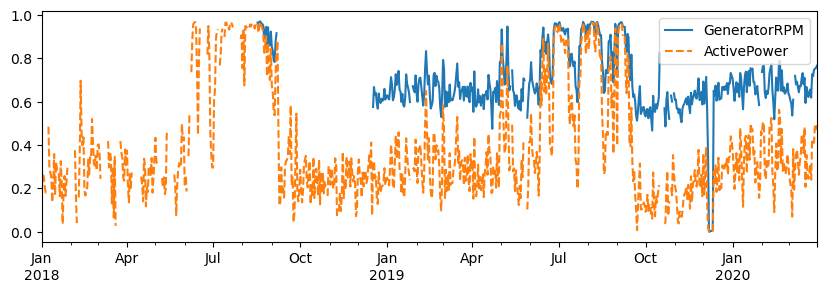

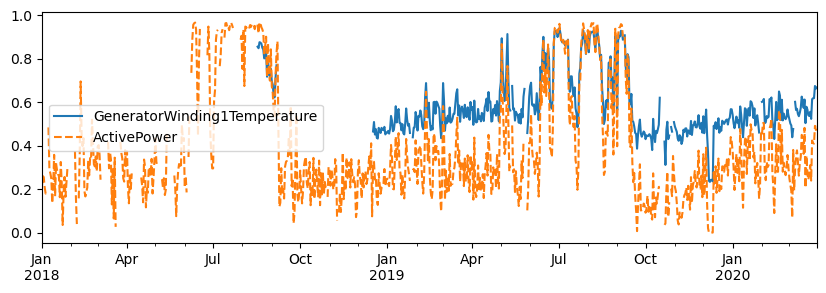

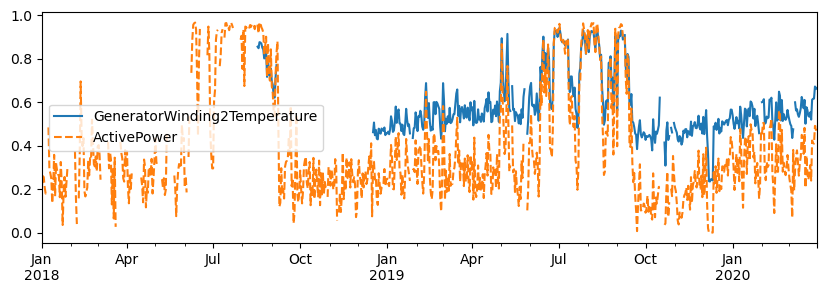

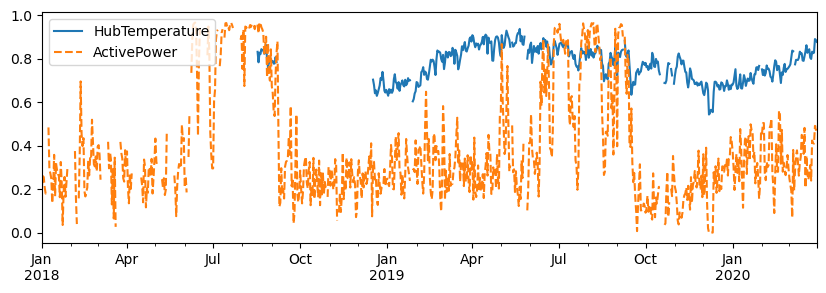

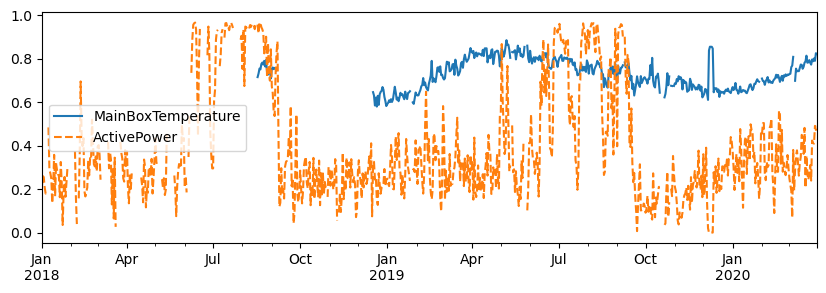

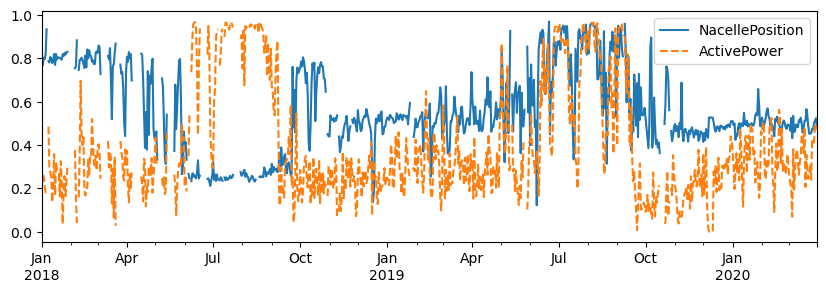

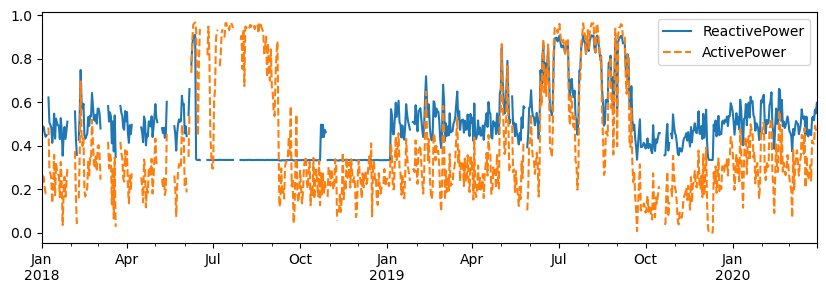

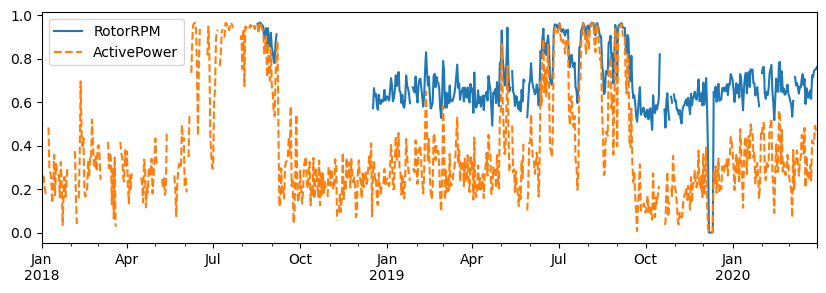

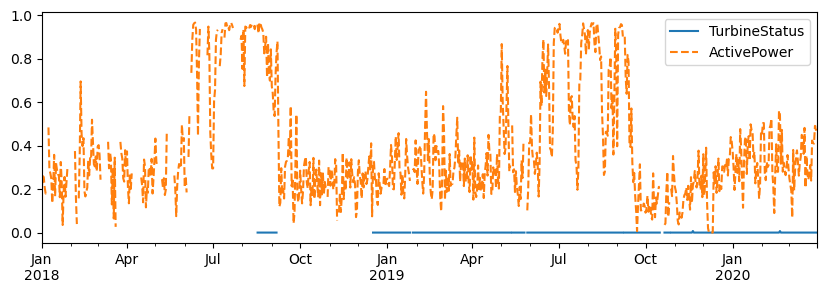

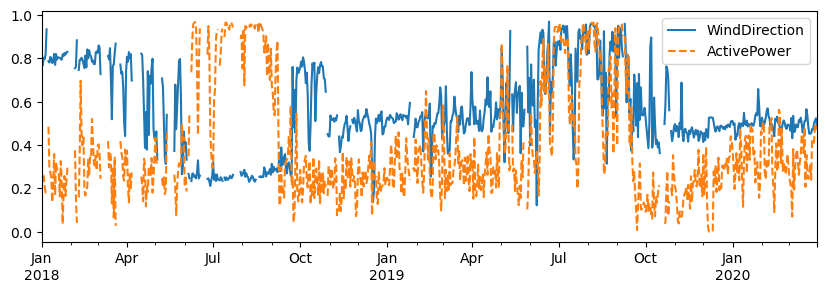

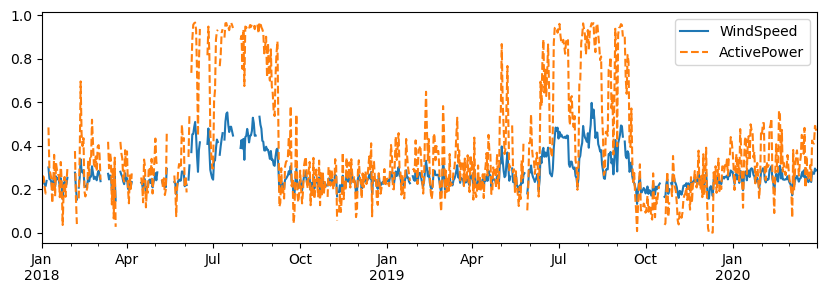

In [16]:
for i in df2:
  plt.figure(figsize = (10,3))
  df2[i].resample('D').mean().plot(legend=i)
  df2['ActivePower'].resample('D').mean().plot(style = '--',legend='ActivePower')
  plt.legend()
  plt.show()

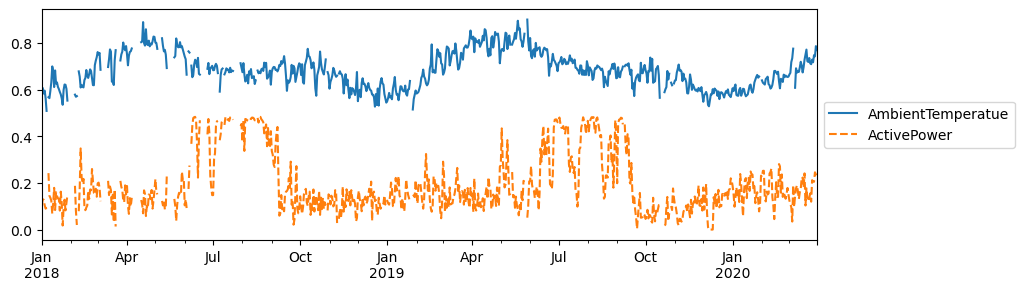

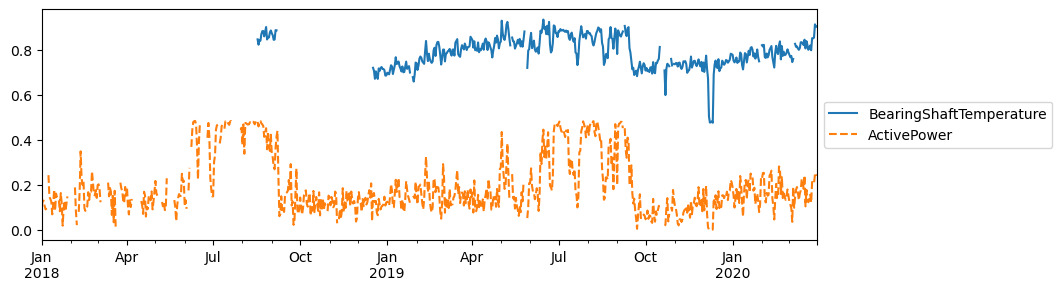

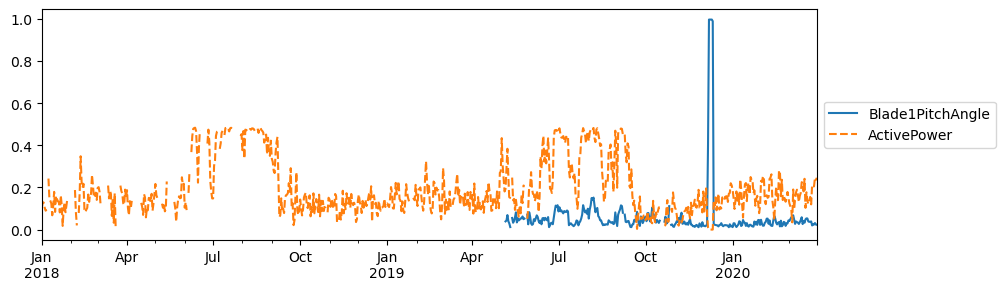

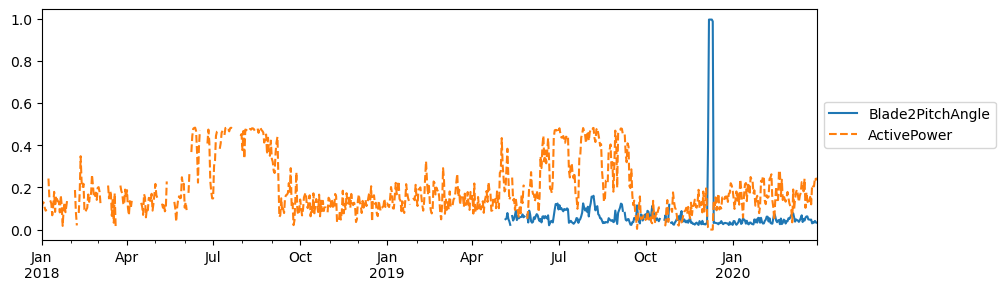

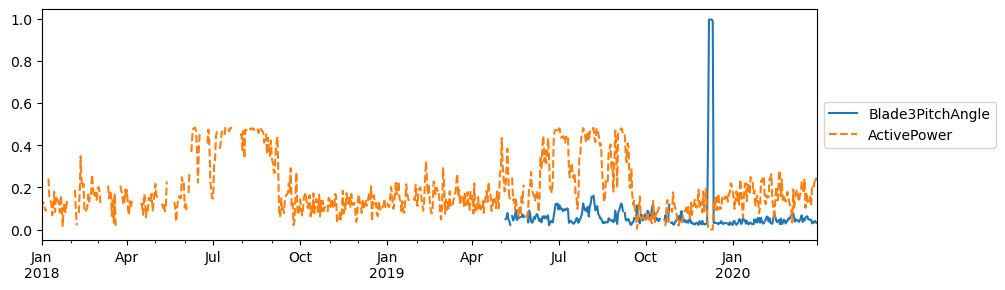

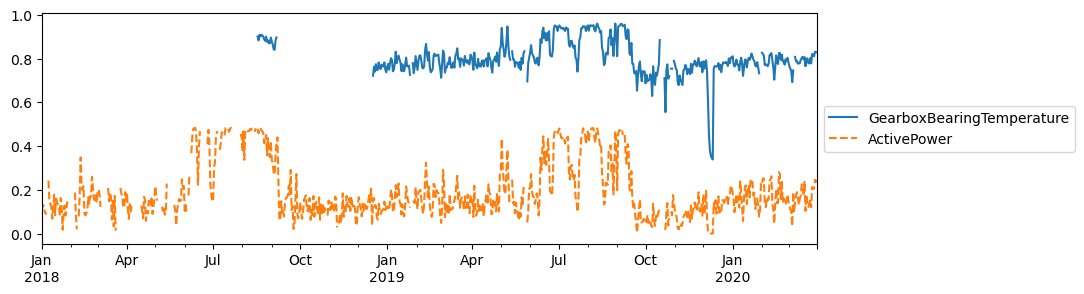

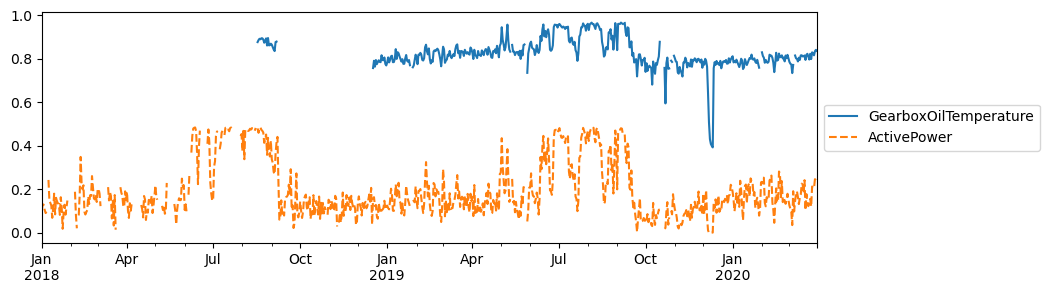

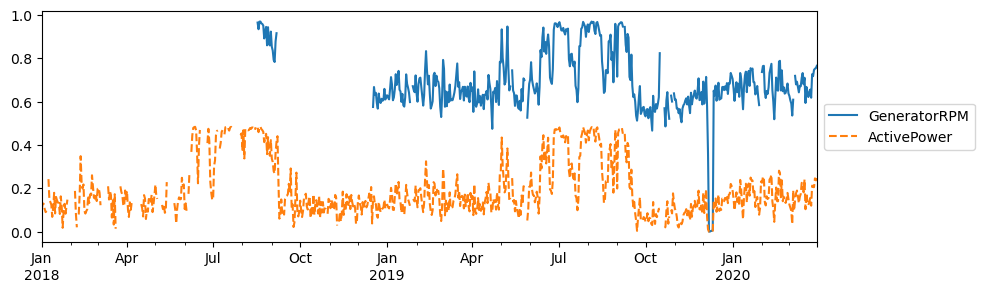

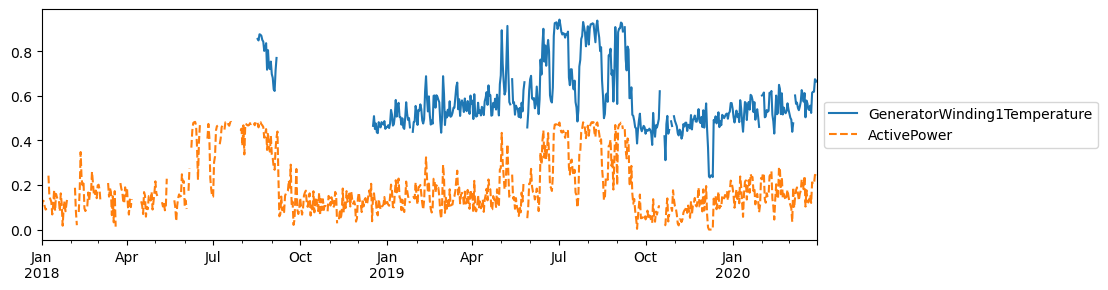

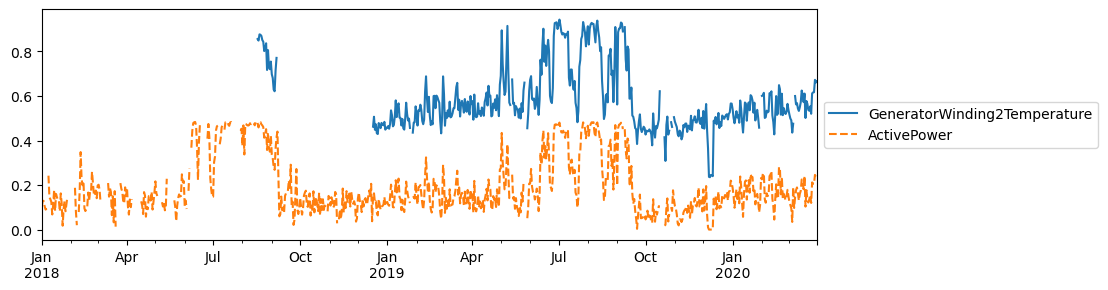

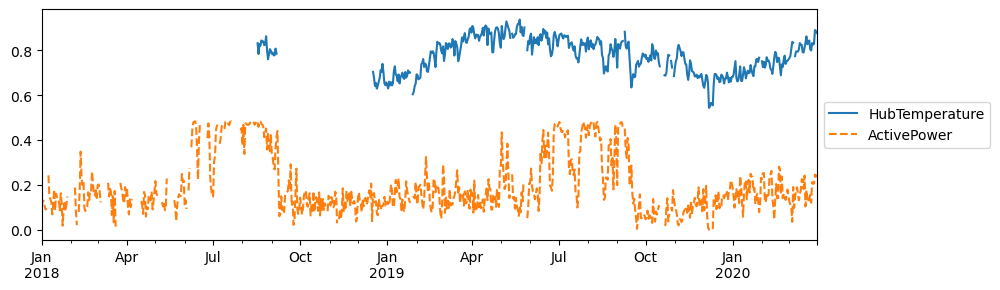

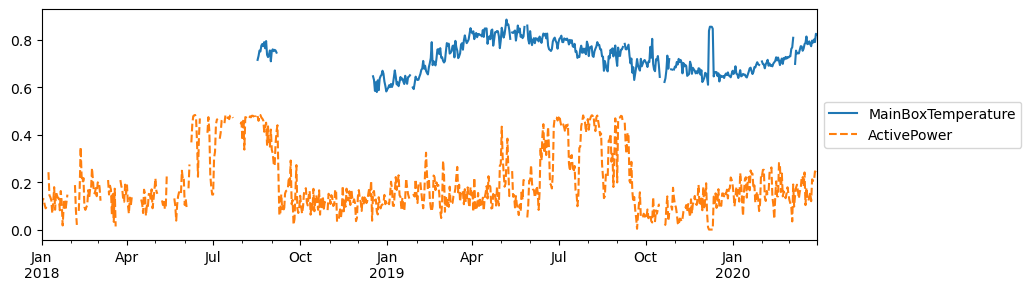

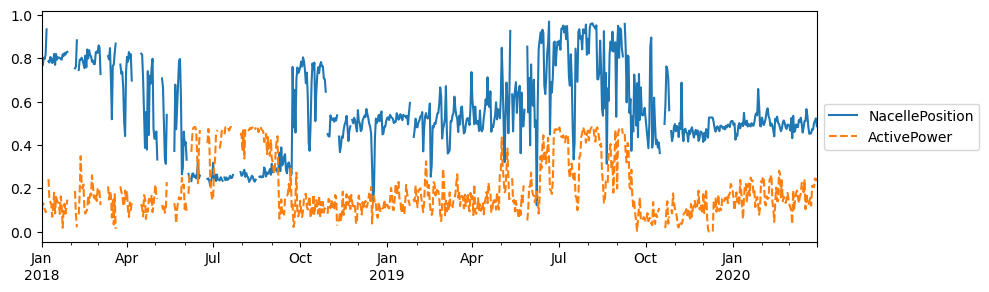

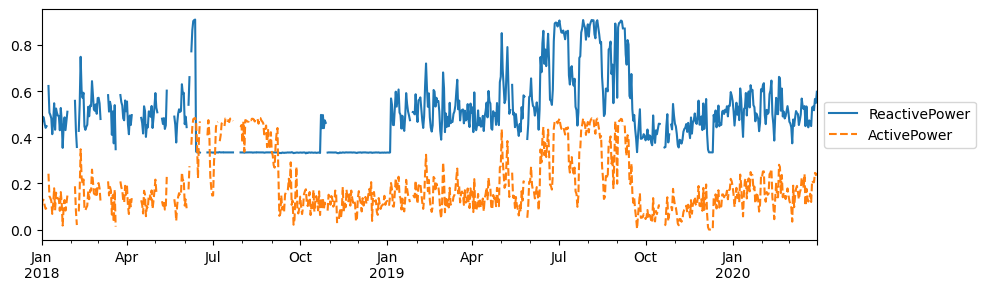

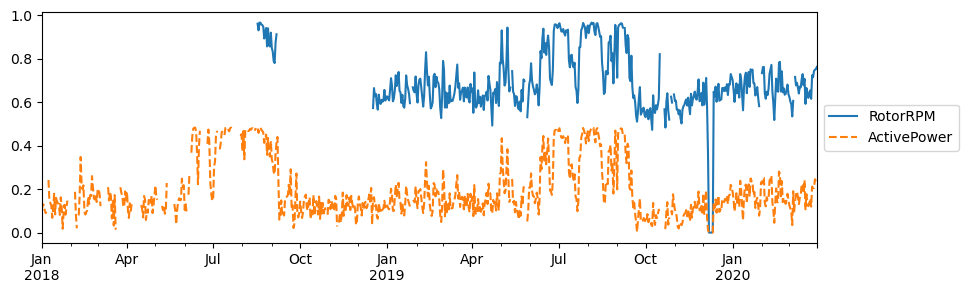

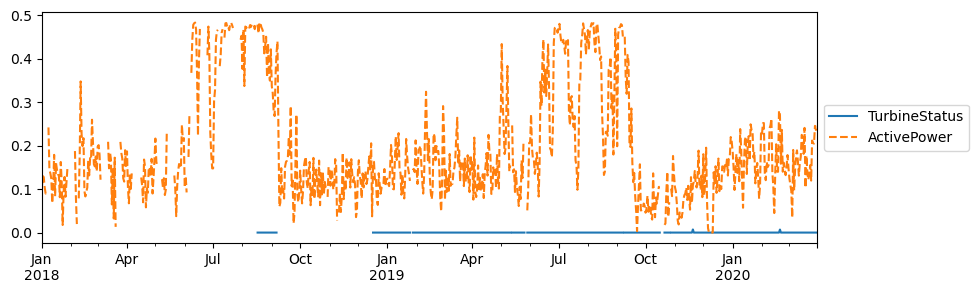

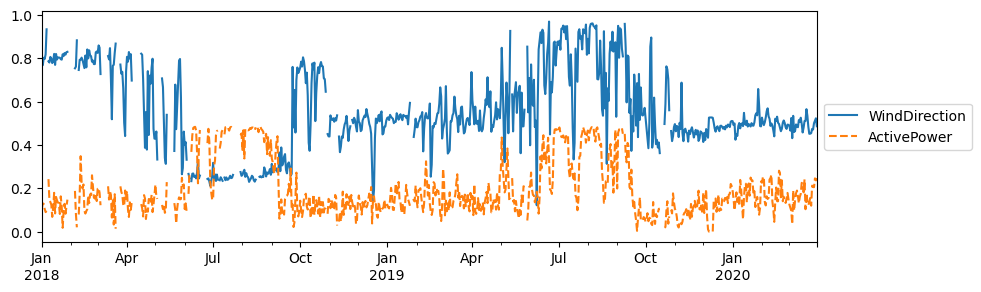

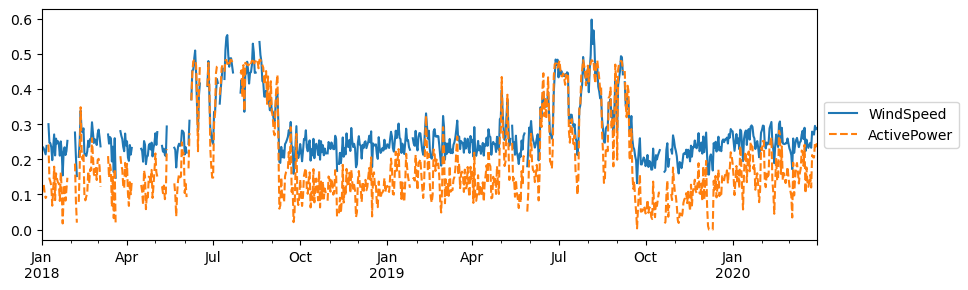

In [17]:
# We can see that they overlap a lot so it is not clear. So we will scale the ActivePower a bit lower to be able and see paterns
for i in df2.iloc[:,1:]:
  plt.figure(figsize = (10,3))
  df2[i].resample('D').mean().plot(legend=i)
  (df2['ActivePower']*0.5).resample('D').mean().plot(style = '--',legend='ActivePower')
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  plt.show()

WindSpeed and ActivePower have a very high possigitve correlation so we can use WindSpeed to train our model. Also before Jan 2019 it looks like we have issues/missing data for many variables. So we either need to remove them completly or remove the data before Jan 2019.

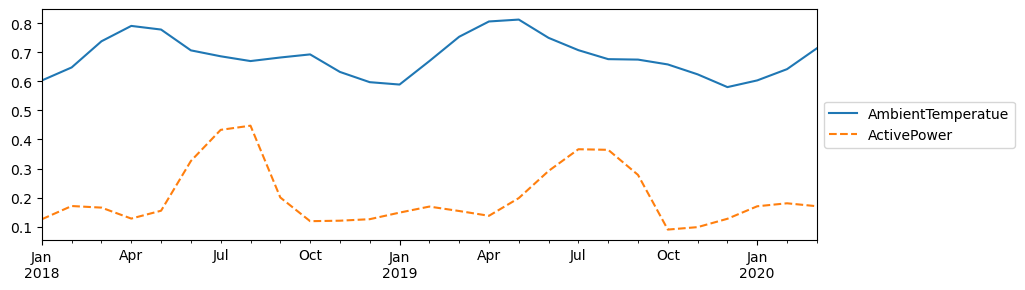

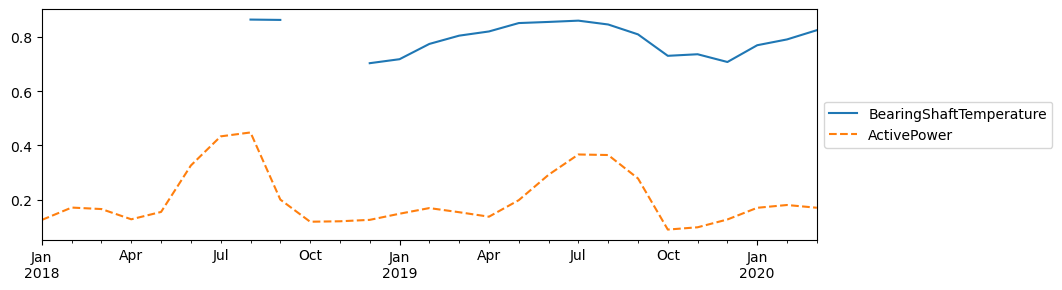

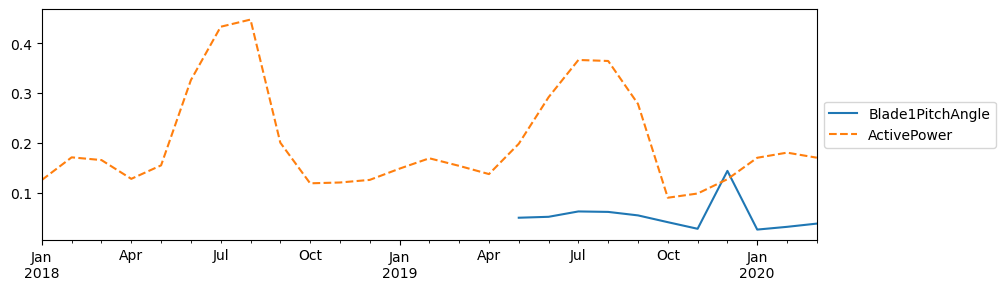

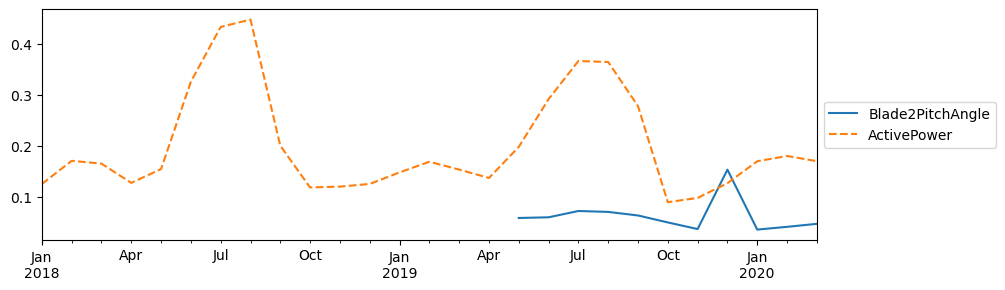

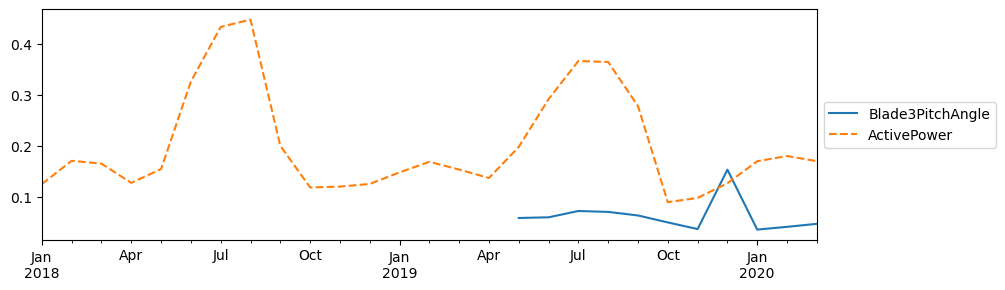

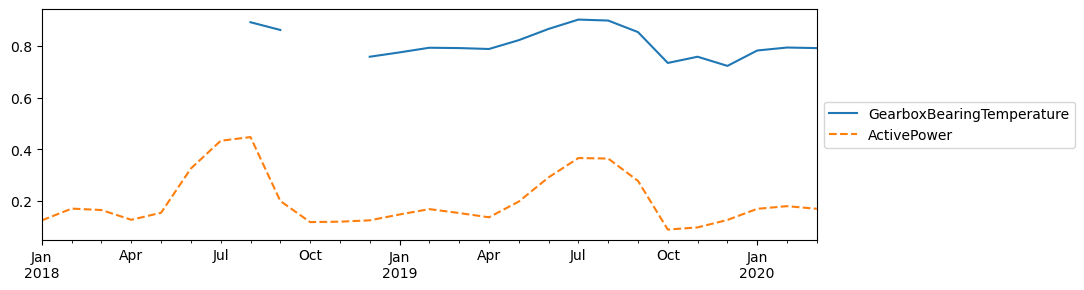

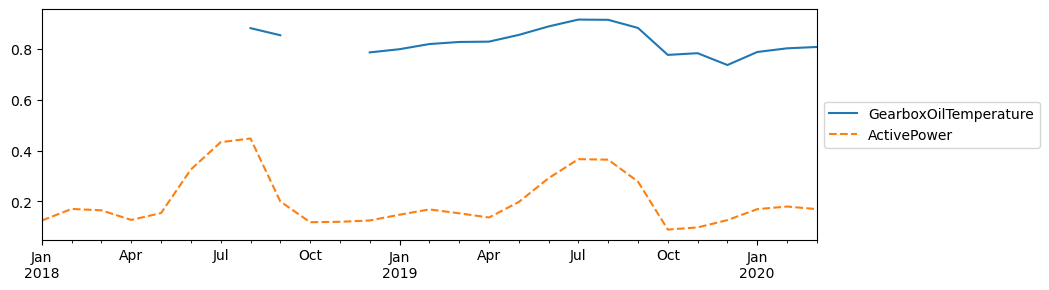

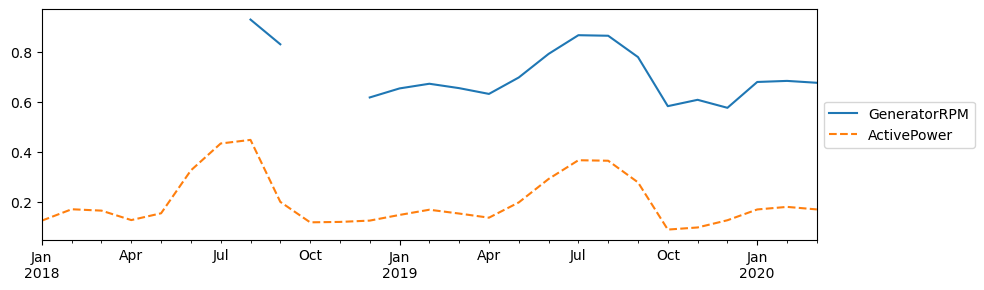

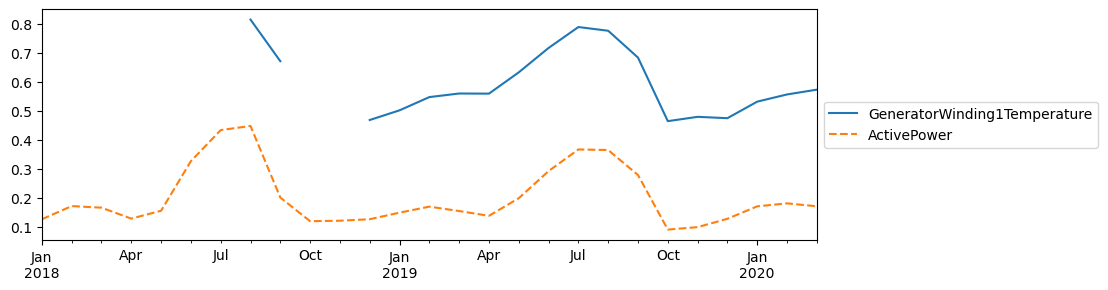

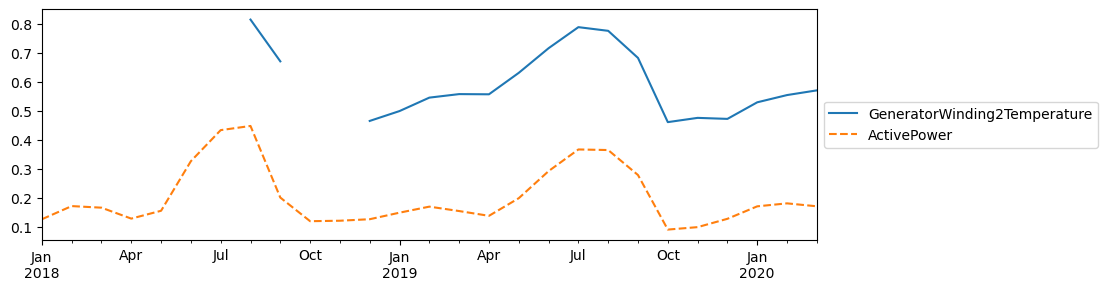

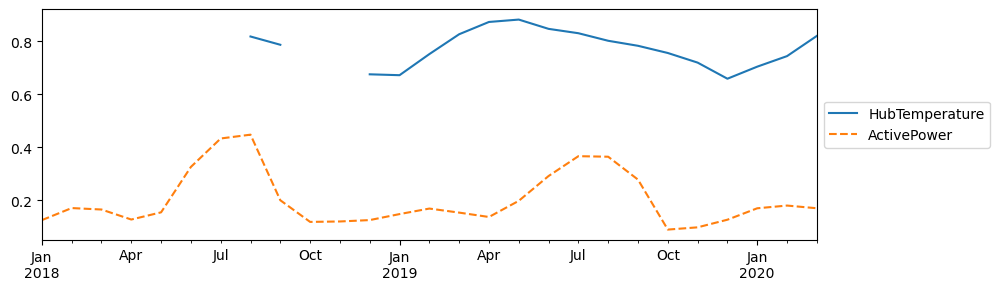

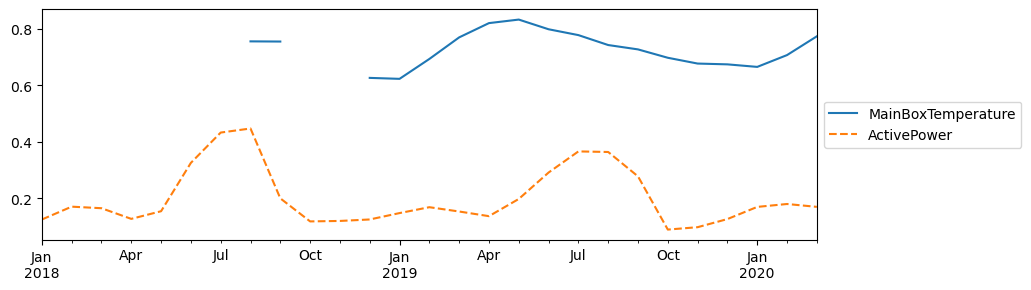

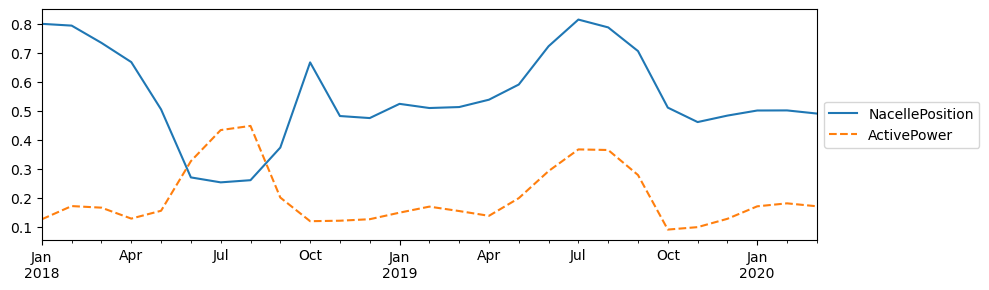

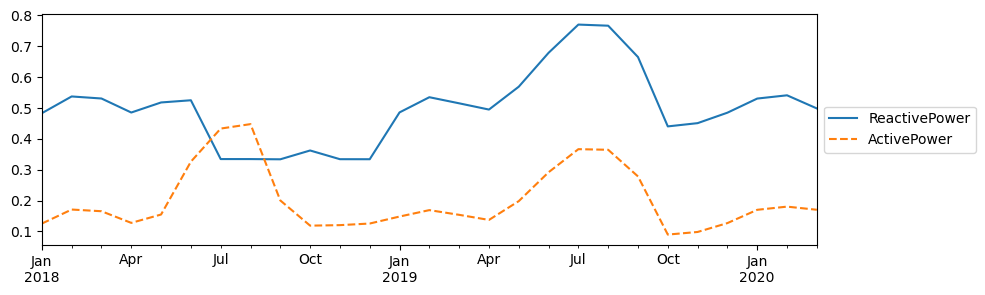

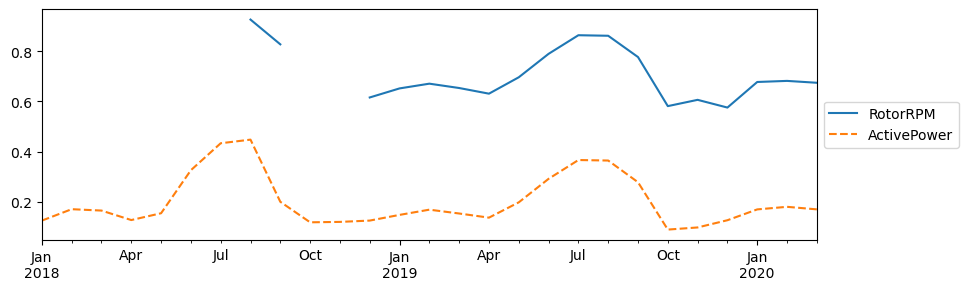

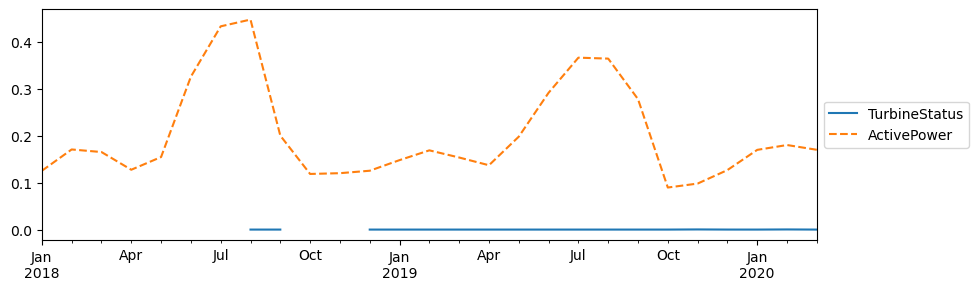

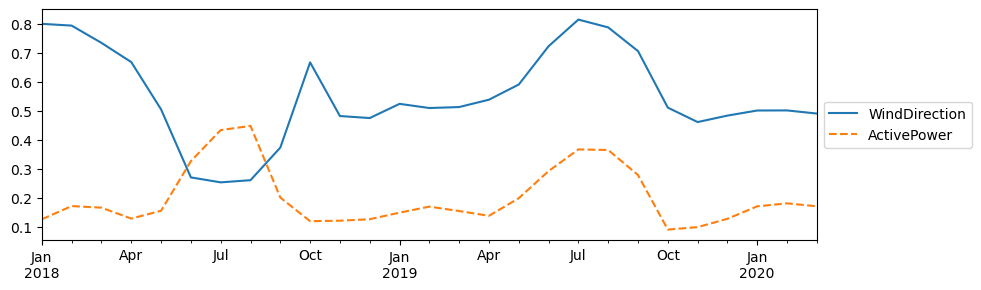

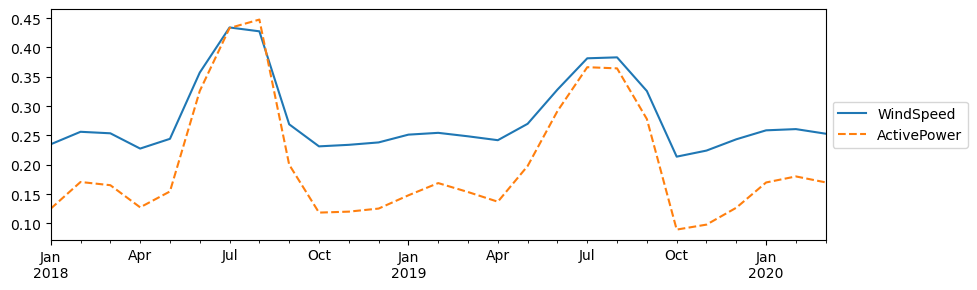

In [19]:
# We can see that they overlap a lot so it is not clear. So we will scale the ActivePower a bit lower to be able and see paterns
for i in df2.iloc[:,1:]:
  plt.figure(figsize = (10,3))
  df2[i].resample('ME').mean().plot(legend=i)
  (df2['ActivePower']*0.5).resample('ME').mean().plot(style = '--',legend='ActivePower')
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  plt.show()

Remove Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle as we dont have enough data.

In [20]:
df.drop(['Blade1PitchAngle','Blade2PitchAngle','Blade3PitchAngle'], axis=1, inplace=True)

In [21]:
# Those 5 factors are the only factors that have data for the full timeline
V1 = ['AmbientTemperatue', 'NacellePosition','ReactivePower','WindDirection','WindSpeed']

In [24]:
# If we are planning of keeping all data then use this dataset that limits down the date range
df_v2 = df[df.index>='2019-01-01'].copy()

## Quantitative analysis (Checks)

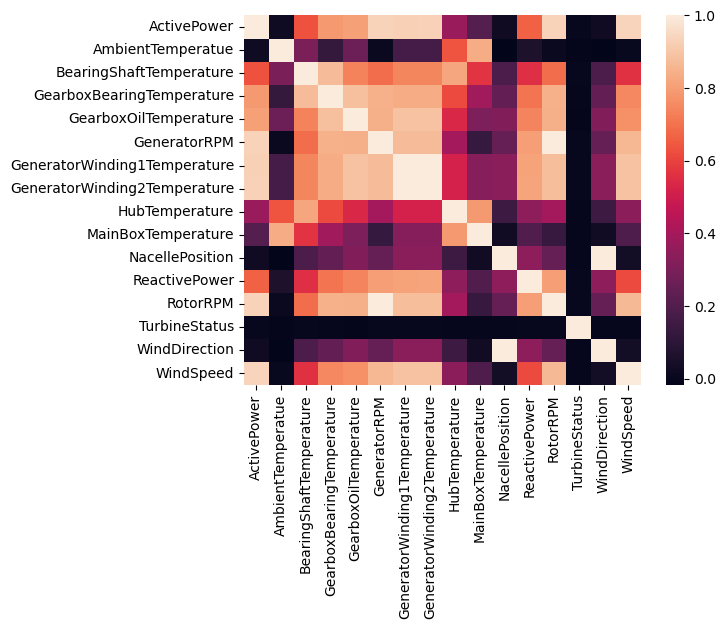

In [25]:
sns.heatmap(df.corr());

In [26]:
# Get the values
correlations = df.corr().unstack().sort_values(ascending=False)
correlations['ActivePower']

ActivePower                     1.000000
WindSpeed                       0.937870
RotorRPM                        0.935928
GeneratorRPM                    0.934303
GeneratorWinding2Temperature    0.928769
GeneratorWinding1Temperature    0.927517
GearboxOilTemperature           0.801319
GearboxBearingTemperature       0.786150
ReactivePower                   0.662808
BearingShaftTemperature         0.631922
HubTemperature                  0.372788
MainBoxTemperature              0.207514
WindDirection                   0.024547
NacellePosition                 0.024547
AmbientTemperatue               0.019064
TurbineStatus                  -0.001115
dtype: float64

WindSpeed has very high correlation with our target so this will give us a very good model. But lets check before that if there are nay that are not very highly correlated with WindSpeed so we can try and add them in the model and check if the performance will be impoved.


In [27]:
correlations['WindSpeed']

WindSpeed                       1.000000
ActivePower                     0.937870
GeneratorWinding2Temperature    0.891562
GeneratorWinding1Temperature    0.891162
RotorRPM                        0.866402
GeneratorRPM                    0.864746
GearboxOilTemperature           0.768463
GearboxBearingTemperature       0.748906
ReactivePower                   0.616855
BearingShaftTemperature         0.561706
HubTemperature                  0.338256
MainBoxTemperature              0.190851
WindDirection                   0.031545
NacellePosition                 0.031545
AmbientTemperatue               0.003487
TurbineStatus                  -0.002182
dtype: float64

In [32]:
V1

['AmbientTemperatue',
 'NacellePosition',
 'ReactivePower',
 'WindDirection',
 'WindSpeed']

In [33]:
# Keep anything that it is below 50%
V2 = list(correlations['WindSpeed'][correlations['WindSpeed']<0.5].index)+['WindSpeed']
V2

['HubTemperature',
 'MainBoxTemperature',
 'WindDirection',
 'NacellePosition',
 'AmbientTemperatue',
 'TurbineStatus',
 'WindSpeed']

Comparing the V1 and V2 we can see that V2 factors have to be used ony after Jan 2019.  
Now we will build 2 models. One only with the WindSpeed and another with the V2. The V2 model will use only data after Jan 2019

# Data Modelling

## Split Data

In [34]:
len(df)

78989

In [35]:
df_2 = df.copy().sort_index()
df_v2_2 = df_v2.copy().sort_index()

In [37]:
len(df_2), len(df_v2_2)

(78989, 49540)

In [59]:
X_train,X_eval,X_test,y_train,y_eval,y_test  = (df_2['WindSpeed'][0:70000], 
df_2['WindSpeed'][70000:74000], df_2['WindSpeed'][74000:], 
df_2['ActivePower'][0:70000], df_2['ActivePower'][70000:74000], 
df_2['ActivePower'][74000:])

X_train2,X_eval2,X_test2,y_train2,y_eval2,y_test2 = (df_v2_2[V2][0:40000], 
df_v2_2[V2][40000:44000], df_v2_2[V2][44000:], 
df_v2_2['ActivePower'][0:40000], df_v2_2['ActivePower'][40000:44000], 
df_v2_2['ActivePower'][44000:])

## Train Models

In [60]:
model1 = xgb.XGBRegressor(n_estimators=200, early_stopping_rounds = 50).fit(X_train,y_train, eval_set = [(X_eval,y_eval)]) #, eval_metric :
model2 = xgb.XGBRegressor(n_estimators=200, early_stopping_rounds = 50).fit(X_train2,y_train2, eval_set = [(X_eval2,y_eval2)]) #, eval_metric :

[0]	validation_0-rmse:362.91214
[1]	validation_0-rmse:260.71208
[2]	validation_0-rmse:191.23947


[3]	validation_0-rmse:145.02367
[4]	validation_0-rmse:115.42186
[5]	validation_0-rmse:97.33455
[6]	validation_0-rmse:86.83373
[7]	validation_0-rmse:80.97209
[8]	validation_0-rmse:77.78990
[9]	validation_0-rmse:76.07476
[10]	validation_0-rmse:75.13931
[11]	validation_0-rmse:74.62630
[12]	validation_0-rmse:74.33402
[13]	validation_0-rmse:74.16473
[14]	validation_0-rmse:74.06366
[15]	validation_0-rmse:74.00078
[16]	validation_0-rmse:73.96104
[17]	validation_0-rmse:73.93632
[18]	validation_0-rmse:73.91712
[19]	validation_0-rmse:73.90667
[20]	validation_0-rmse:73.89964
[21]	validation_0-rmse:73.89472
[22]	validation_0-rmse:73.89174
[23]	validation_0-rmse:73.89072
[24]	validation_0-rmse:73.88883
[25]	validation_0-rmse:73.88755
[26]	validation_0-rmse:73.88674
[27]	validation_0-rmse:73.88574
[28]	validation_0-rmse:73.88476
[29]	validation_0-rmse:73.88495
[30]	validation_0-rmse:73.88439
[31]	validation_0-rmse:73.88535
[32]	validation_0-rmse:73.88534
[33]	validation_0-rmse:73.88562
[34]	validati

In [62]:
df_preds = pd.DataFrame(X_test)
df_preds['ActivePower'] = y_test
df_preds['preds'] = model1.predict(X_test)
df_preds2 = pd.DataFrame(X_test2)
df_preds2['ActivePower'] = y_test2
df_preds2['preds2'] = model2.predict(X_test2)
df_preds.head()

WindSpeed  ActivePower       preds
2020-02-17 01:30:00+00:00   4.669358   223.502106  226.760498
2020-02-17 01:40:00+00:00   5.033747   299.065840  288.245239
2020-02-17 01:50:00+00:00   5.667760   353.764427  430.987091
2020-02-17 02:00:00+00:00   5.498650   395.836905  386.819641
2020-02-17 02:10:00+00:00   5.485052   336.413385  386.819641

## Check models' performance

In [63]:
d =[]
d.append ({
    'Model':'Model1',
    'R2':r2_score(y_true=y_test, y_pred=df_preds['preds']),
    'MAE':mean_absolute_error(y_true=y_test, y_pred=df_preds['preds']),
    'RMSE': mean_squared_error(y_true=y_test, y_pred=df_preds['preds']),
    'MAPE':mean_absolute_percentage_error(y_true=y_test, y_pred=df_preds['preds'])
})
d.append ({
    'Model':'Model2',
    'R2':r2_score(y_true=y_test2, y_pred=df_preds2['preds2']),
    'MAE':mean_absolute_error(y_true=y_test2, y_pred=df_preds2['preds2']),
    'RMSE': mean_squared_error(y_true=y_test2, y_pred=df_preds2['preds2']),
    'MAPE':mean_absolute_percentage_error(y_true=y_test2, y_pred=df_preds2['preds2'])
})
results = pd.DataFrame(d)
results

Model        R2        MAE         RMSE          MAPE
0  Model1  0.976926  53.289168  6006.697352  5.754138e+13
1  Model2  0.980945  47.217469  4878.889402  5.984223e+12

c:\Users\didi1\Anaconda3\envs\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\didi1\Anaconda3\envs\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\didi1\Anaconda3\envs\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\didi1\Anaconda3\envs\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

<Axes: ylabel='ActivePower'>

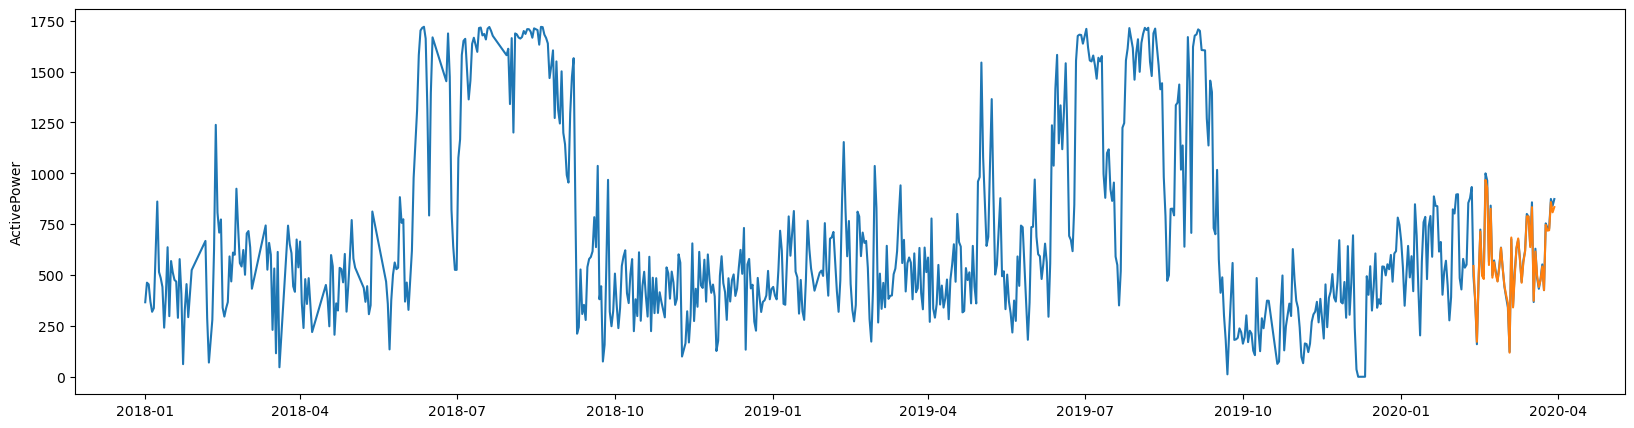

In [67]:
plt.figure(figsize=(20,5))
sns.lineplot(df['ActivePower'].resample('D').mean())
sns.lineplot(df_preds2['preds2'].resample('D').mean())

We can see that our model is really good.

# Save the model

In [73]:
import pickle
file_name = 'model2.pkl'
pickle.dump(model2, open(file_name, 'wb'))

In [76]:
# Input columns for our App
X_test2.columns

Index(['HubTemperature', 'MainBoxTemperature', 'WindDirection',
       'NacellePosition', 'AmbientTemperatue', 'TurbineStatus', 'WindSpeed'],
      dtype='object')